# A musical analysis of the Top U.S songs.

## Exploration of musical data from 1959 to 2023 using Natural Language Processing.

### Bonjour et bienvenue to my NLP presentation !

For my first individual project at Code Op, I chose to explore the history of music in the United States using Natural Language Processing (NLP). This study spans from the 1960s to the 2020s, offering an in-depth analysis of how music has evolved across different generations. We'll examine various aspects, from song lengths to changes in vocabulary, to uncover the trends and shifts in musical expression over the decades. 

### But first, let's import the librairies we'll need

In [20]:
from collections import Counter
import matplotlib.pyplot as plt
from langdetect import detect
import ipywidgets as widgets
import seaborn as sns
import pandas as pd
import nltk
import re

### Importing the dataset

In [21]:
data = pd.read_csv('Top100_Songs/all_songs_data_processed.csv')
data

,Album,Album URL,Artist,Featured Artists,Lyrics,Media,Rank,Release Date,Song Title,Song URL,Writers,Year,Verbs,Nouns,Adverbs,Corpus,Word Counts,Unique Word Counts
0,Battle of New Orleans,https://genius.com/albums/Johnny-horton/Battle...,Johnny Horton,[],In 1814 we took a little trip Along with Colo...,[{'native_uri': 'spotify:track:0dwpdcQkeZqpuoA...,1,1959-04-01,The Battle Of New Orleans,https://genius.com/Johnny-horton-the-battle-of...,"[{'api_path': '/artists/561913', 'header_image...",1959.0,take take take catch fire keep be be fire begi...,trip bacon bean town gun comin while river of'...,along as ago once more so as ago once more the...,take little trip Colonel Jackson mighty Missis...,435,155
1,That’s All,https://genius.com/albums/Bobby-darin/That-s-all,Bobby Darin,[],"Oh the shark, babe Has such teeth, dear And he...",[{'native_uri': 'spotify:track:3E5ndyOfO6vFDEI...,2,NaN,Mack The Knife,https://genius.com/Bobby-darin-mack-the-knife-...,"[{'api_path': '/artists/218851', 'header_image...",1959.0,have show have keep know bite billow spread be...,shark babe tooth jackknife babe sight shark to...,pearly just so never never now just just down ...,oh shark babe tooth dear show pearly white jac...,224,145
2,“Mr Personality’s” 15 Big Hits,https://genius.com/albums/Lloyd-price/Mr-perso...,Lloyd Price,[],Over and over I tried to prove my love to you ...,"[{'provider': 'youtube', 'start': 0, 'type': '...",3,NaN,Personality,https://genius.com/Lloyd-price-personality-lyrics,"[{'api_path': '/artists/355804', 'header_image...",1959.0,try prove do say get get do cause get get do s...,love friend fool fool personality personality ...,over over over over over over so over now over...,try prove love friend say fool fool cause get ...,215,55
3,The Greatest Hits Of Frankie Avalon,https://genius.com/albums/Frankie-avalon/The-g...,Frankie Avalon,[],"Hey, Venus! Oh, Venus! Venus, if you will Ple...",[],4,NaN,Venus,https://genius.com/Frankie-avalon-venus-lyrics,"[{'api_path': '/artists/1113175', 'header_imag...",1959.0,send thrill want make take place ask promise g...,girl girl kiss arm girl charm girl sunlight ha...,surely too always as long surely too always as...,hey Venus oh Venus Venus send little girl thri...,166,74
4,Paul Anka Sings His Big 15,https://genius.com/albums/Paul-anka/Paul-anka-...,Paul Anka,[],I'm just a lonely boy Lonely and blue I'm all ...,[],5,NaN,Lonely Boy,https://genius.com/Paul-anka-lonely-boy-lyrics,[],1959.0,do get think want love love kiss hold like hea...,boy nothing moment love night day boy nothing ...,just all just all just so hard just all,lonely boy lonely blue get think want love yes...,140,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6287,One Thing At A Time,https://genius.com/albums/Morgan-wallen/One-th...,Morgan Wallen,[],When it comes to hitchin' the boat up Backin' ...,"[{'attribution': 'morgan wallen', 'provider': ...",95,2023-01-31,I Wrote the Book,https://genius.com/Morgan-wallen-i-wrote-the-b...,"[{'api_path': '/artists/675171', 'header_image...",2023.0,come find catch write write wanna learn throw ...,boat ramp truck bunch log bunch hog book book ...,damn enough never too damn enough probably dam...,come hitchin boat Backin ramp old truck find b...,374,134
6288,BZRP Music Sessions,https://genius.com/albums/Bizarrap/Bzrp-music-...,Bizarrap and Shakira,[],"(Pa' tipos como tú, uh-uh-uh-uh) Oh-oh (Oh-oh...","[{'provider': 'youtube', 'start': 0, 'type': '...",96,2023-01-11,"Bzrp Music Sessions, Vol. 53",https://genius.com/Bizarrap-and-shakira-shakir...,"[{'api_path': '/artists/1405', 'header_image_u...",2023.0,eso que que que que heriste mujere like person...,tipos tipos vuelvo quiero que baby como a ti p...,also,Pa tipos como tú uh uh uh uh oh oh oh oh Pa ti...,405,192
6289,L3*,https://genius.com/albums/Latto/L3,Latto featuring Cardi B,"[{'api_path': '/artists/621678', 'header_image...",(Go Grizz) Ah (Squat made the beat) What's hap...,"[{'provider': 'youtube', 'start

## Cleaning of the data

### **Observations** : 

As you may have noticed this dataset has many different columns and **it is at frist a bit complexe to understand certain data**. I have then decided to select only the data I was going to focus on : **Artist, Song, Title, Lyrics, Album, Year, Verbs, Nouns, Adverbs, Words Counts, Unique Word Counts**

In [22]:
data= data[['Artist','Song Title','Lyrics','Album','Year','Verbs','Nouns','Adverbs','Word Counts','Unique Word Counts']]

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6292 entries, 0 to 6291
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist              6292 non-null   object 
 1   Song Title          6292 non-null   object 
 2   Lyrics              6271 non-null   object 
 3   Album               5973 non-null   object 
 4   Year                6292 non-null   float64
 5   Verbs               6243 non-null   object 
 6   Nouns               6249 non-null   object 
 7   Adverbs             6196 non-null   object 
 8   Word Counts         6292 non-null   int64  
 9   Unique Word Counts  6292 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 491.7+ KB


In [24]:
data = data.dropna(how="any", subset = ["Lyrics"])

In [25]:
data.columns = data.columns.str.lower()
data['year'] = data['year'].astype(int)

In [26]:
def year_to_decade(year):
    return (year // 10) * 10

data['decade'] = data['year'].apply(year_to_decade) 

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6271 entries, 0 to 6291
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   artist              6271 non-null   object
 1   song title          6271 non-null   object
 2   lyrics              6271 non-null   object
 3   album               5953 non-null   object
 4   year                6271 non-null   int64 
 5   verbs               6243 non-null   object
 6   nouns               6249 non-null   object
 7   adverbs             6196 non-null   object
 8   word counts         6271 non-null   int64 
 9   unique word counts  6271 non-null   int64 
 10  decade              6271 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 587.9+ KB


### **Notes** :

Certains columns have many NaN but I did not want to get rid of all the songs with some NaN to avoid introducing bias in my data. Especially when sometimes it won't affect my analysis much, for example for the albumns or adverbs.

In [28]:
def is_english(text):
    try:
        return detect(text) == 'en'
    except:
        return False

print('NUMBER OF TOTAL SONGS :')
print('-----------------------')
print(len(data['lyrics']))

data['is_english'] = data['lyrics'].apply(is_english)
data_english = data[data['is_english']]
print('')
print('NUMBER OF SONGS IN ENGLISH :')
print('----------------------------')
print(len(data_english))


NUMBER OF TOTAL SONGS :
-----------------------
6271

NUMBER OF SONGS IN ENGLISH :
----------------------------
6152


## Extra analysis

### Which artists are in the list

In [29]:
# Dynamically get the unique decades from the data
decades = sorted(data_english['decade'].unique())

# Create a dictionary of artists for each decade
artists_dict = {
    f'artists_of_{decade}s': data_english[data_english['decade'] == decade]['artist'].tolist()
    for decade in decades
}

# Find the maximum length of the lists in artists_dict
max_len = max(len(lst) for lst in artists_dict.values())

# Ensure all lists in artists_dict have the same length
for key in artists_dict:
    artists_dict[key] += [None] * (max_len - len(artists_dict[key]))

# Convert the dictionary to a DataFrame
artists = pd.DataFrame(artists_dict)

# Function to preprocess artist names
def preprocess_artists(text):
    if isinstance(text, str):
        text = re.sub(r'[^\w\s]', '', text.lower())
        return text
    return ''  

# Function to process artists and get the most common ones
def process_artists(df, column):
    df['processed_' + column] = df[column].apply(preprocess_artists)
    non_empty_artists = df['processed_' + column][df['processed_' + column] != '']
    artist_counts = Counter(non_empty_artists)
    most_common_artists = artist_counts.most_common(20)
    return [(artist, count) for artist, count in most_common_artists]

# Function to plot the most common artists of a given decade
def plot_most_common_artists(decade_str):
    decade = decade_str[:-1]
    column_name = f'artists_of_{decade}s'
    if column_name not in artists.columns:
        print(f"No data available for the {decade_str}")
        return
    
    most_common_artists = process_artists(artists, column_name)
    if not most_common_artists:
        print(f"No artist data available for the {decade_str}")
        return
    
    artists_names, counts = zip(*most_common_artists)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=counts, y=artists_names, hue= artists_names, legend=False)
    plt.title(f'Most Common Artists of the {decade_str}')
    plt.xlabel('Frequency')
    plt.ylabel('Artists')
    plt.show()

# Create a dropdown widget for selecting decade
decades_str = [f'{str(decade)}s' for decade in decades]
decade_dropdown = widgets.Dropdown(
    options=decades_str,
    description='Decade:',
    disabled=False
)

# Display the plot based on the selected decade
widgets.interact(plot_most_common_artists, decade_str=decade_dropdown)

interactive(children=(Dropdown(description='Decade:', options=('1950s', '1960s', '1970s', '1980s', '1990s', '2…

<function __main__.plot_most_common_artists(decade_str)>

## Now, time to plot !

### When were songs the wordiest?

First, we'll focus on the lenth of songs, not in minutes but on the amount of words. 

## Per Decades

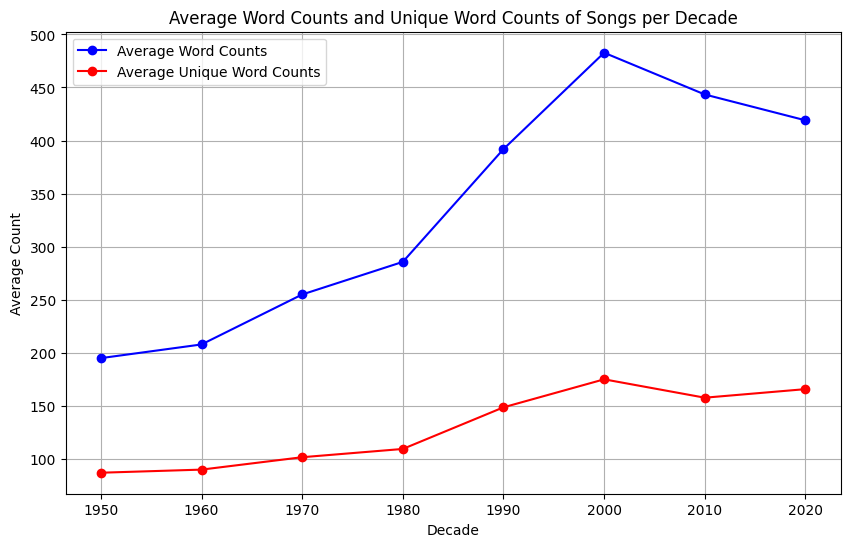

In [30]:
# Group by decade and calculate the average word count and unique word count
average_word_counts_per_decade = data_english.groupby('decade')['word counts'].mean().reset_index()
average_unique_word_counts_per_decade = data_english.groupby('decade')['unique word counts'].mean().reset_index()

# Plotting the average word counts and average unique word counts for each decade
plt.figure(figsize=(10, 6))
plt.plot(average_word_counts_per_decade['decade'], average_word_counts_per_decade['word counts'], marker='o', linestyle='-', color='b', label='Average Word Counts')
plt.plot(average_unique_word_counts_per_decade['decade'], average_unique_word_counts_per_decade['unique word counts'], marker='o', linestyle='-', color='r', label='Average Unique Word Counts')

# Adding titles and labels
plt.title('Average Word Counts and Unique Word Counts of Songs per Decade')
plt.xlabel('Decade')
plt.ylabel('Average Count')
plt.grid(True)
plt.legend()

# Display the plot
plt.show()

## Per Years

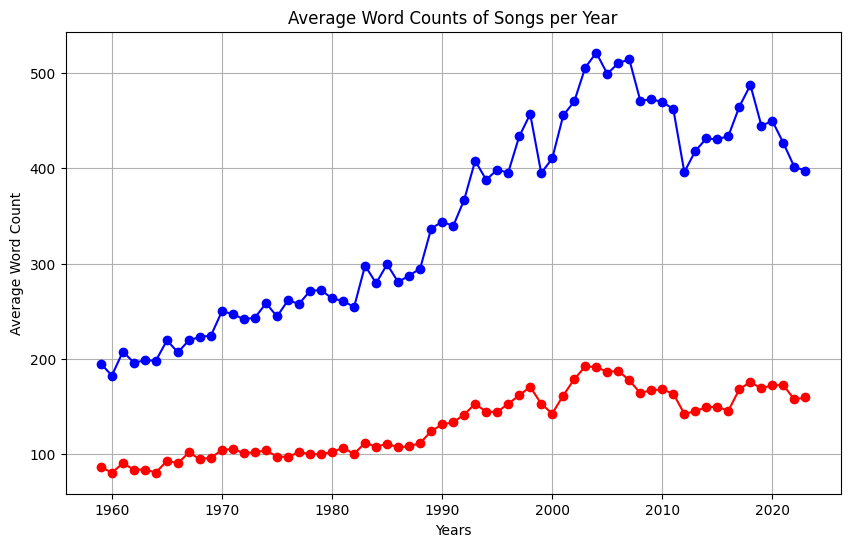

In [31]:
average_word_counts_per_year = data_english.groupby('year')['word counts'].mean().reset_index()
average_unique_word_counts_per_year = data_english.groupby('year')['unique word counts'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(average_word_counts_per_year['year'], average_word_counts_per_year['word counts'], marker='o', linestyle='-', color='b', label='Average Word Counts')
plt.plot(average_unique_word_counts_per_year['year'], average_unique_word_counts_per_year['unique word counts'], marker='o', linestyle='-', color='r', label='Average Unique Word Counts')

plt.title('Average Word Counts of Songs per Year')
plt.xlabel('Years')
plt.ylabel('Average Word Count')
plt.grid(True)

plt.show()

## What do we actually sing about ? 

### Let's take a minute to think about what are, according to you, the themes that we sing about the most ? 

In [39]:
def preprocess_text(text):
    if isinstance(text, str):  
        text = re.sub(r'[^\w\s]', '', text.lower())
        words = nltk.word_tokenize(text)
        return words
    return []  

data_english['processed_nouns'] = data_english['nouns'].apply(preprocess_text)

all_nouns = [noun for sublist in data_english['processed_nouns'] for noun in sublist]

most_common_nouns = Counter(all_nouns).most_common(20)

for word, count in most_common_nouns:
    print(f"{word}: {count}")

love: 12322
baby: 10369
time: 7254
girl: 6531
way: 5994
night: 5273
heart: 4266
day: 4192
thing: 4137
life: 3918
man: 3663
eye: 2662
world: 2659
one: 2474
mind: 2450
tonight: 2325
hand: 2140
boy: 2018
friend: 1872
body: 1714


/var/folders/r7/qnp4t1ls5z9b262kt7qlc8fm0000gp/T/ipykernel_780/2386017360.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_english['processed_nouns'] = data_english['nouns'].apply(preprocess_text)


In [15]:
data_english['processed_verbs'] = data_english['verbs'].apply(preprocess_text)

all_verbs = [verb for sublist in data_english['processed_verbs'] for verb in sublist]

most_common_verbs = Counter(all_verbs).most_common(20)

for word, count in most_common_verbs:
    print(f"{word}: {count}")

get: 23137
go: 18263
know: 16947
do: 11113
say: 10404
make: 9828
come: 9416
let: 8992
want: 8743
love: 8577
see: 7945
take: 7685
be: 6696
have: 6484
feel: 6236
tell: 6149
need: 5149
give: 5136
think: 4966
na: 4070


/var/folders/r7/qnp4t1ls5z9b262kt7qlc8fm0000gp/T/ipykernel_780/3408593660.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_english['processed_verbs'] = data_english['verbs'].apply(preprocess_text)


In [16]:
data_english.drop(columns="is_english", axis=1, inplace=True)
data_english.reset_index(drop=True)
data_english

/var/folders/r7/qnp4t1ls5z9b262kt7qlc8fm0000gp/T/ipykernel_780/1292930313.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_english.drop(columns="is_english", axis=1, inplace=True)


,artist,song title,lyrics,album,year,verbs,nouns,adverbs,word counts,unique word counts,decade,processed_nouns,processed_verbs
0,Johnny Horton,The Battle Of New Orleans,In 1814 we took a little trip Along with Colo...,Battle of New Orleans,1959,take take take catch fire keep be be fire begi...,trip bacon bean town gun comin while river of'...,along as ago once more so as ago once more the...,435,155,1950,"[trip, bacon, bean, town, gun, comin, while, r...","[take, take, take, catch, fire, keep, be, be, ..."
1,Bobby Darin,Mack The Knife,"Oh the shark, babe Has such teeth, dear And he...",That’s All,1959,have show have keep know bite billow spread be...,shark babe tooth jackknife babe sight shark to...,pearly just so never never now just just down ...,224,145,1950,"[shark, babe, tooth, jackknife, babe, sight, s...","[have, show, have, keep, know, bite, billow, s..."
2,Lloyd Price,Personality,Over and over I tried to prove my love to you ...,“Mr Personality’s” 15 Big Hits,1959,try prove do say get get do cause get get do s...,love friend fool fool personality personality ...,over over over over over over so over now over...,215,55,1950,"[love, friend, fool, fool, personality, person...","[try, prove, do, say, get, get, do, cause, get..."
3,Frankie Avalon,Venus,"Hey, Venus! Oh, Venus! Venus, if you will Ple...",The Greatest Hits Of Frankie Avalon,1959,send thrill want make take place ask promise g...,girl girl kiss arm girl charm girl sunlight ha...,surely too always as long surely too always as...,166,74,1950,"[girl, girl, kiss, arm, girl, charm, girl, sun...","[send, thrill, want, make, take, place, ask, p..."
4,Paul Anka,Lonely Boy,I'm just a lonely boy Lonely and blue I'm all ...,Paul Anka Sings His Big 15,1959,do get think want love love kiss hold like hea...,boy nothing moment love night day boy nothing ...,just all just all just so hard just all,140,68,1950,"[boy, nothing, moment, love, night, day, boy, ...","[do, get, think, want, love, love, kiss, hold,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6286,Young Nudy featuring 21 Savage,Peaches & Eggplants,This how it sound when I hit your ho Be like t...,Gumbo,2023,sound hit be be get get be be do dig beat do b...,ho ho pussy freak back bladder x ho knee bitch...,then back down deep back down around back stra...,661,253,2020,"[ho, ho, pussy, freak, back, bladder, x, ho, k...","[sound, hit, be, be, get, get, be, be, do, dig..."
6287,Morgan Wallen,I Wrote the Book,When it comes to hitchin' the boat up Backin' ...,One Thing At A Time,2023,come find catch write write wanna learn throw ...,boat ramp truck bunch log bunch hog book book ...,damn enough never too damn enough probably dam...,374,134,2020,"[boat, ramp, truck, bunch, log, bunch, hog, bo...","[come, find, catch, write, write, wan, na, lea..."
6289,Latto featuring Cardi B,Put It on da Floor Again,(Go Grizz) Ah (Squat made the beat) What's hap...,L3*,2023,go make rip be runnin run spend trap think gon...,beat plastic actin brand actin shit ' fore new...,really ever so even back forth home then then ...,604,306,2020,"[beat, plastic, actin, brand, actin, shit, for...","[go, make, rip, be, runnin, run, spend, trap, ..."
6290,Lady Gaga,Bloody Mary,Money Love is just a history that they may p...,Born This Way,2023,prove go tell come kill dance say go dance han...,money history religion king throne stone dance...,just together still as also just together stil...,285,115,2020,"[money, history, religion, king, throne, stone...","[prove, go, tell, come, kill, dance, say, go, ..."


### Nouns

In [17]:
def count_words(text_list):
    all_words = [word for text in text_list for word in preprocess_text(text)]
    return Counter(all_words)


def plot_most_common_nouns(decade):
    lyrics_of_decade = data_english[data_english['decade'] == decade]['nouns'].tolist()
    word_counts = count_words(lyrics_of_decade)
    common_words = word_counts.most_common(20)
    
    if common_words:
        words, counts = zip(*common_words)
        plt.figure(figsize=(10, 6))
        sns.barplot(x=counts, y=words, hue = words, legend=False)
        plt.title(f'Most Common Nouns in {decade}')
        plt.xlabel('Frequency')
        plt.ylabel('Nouns')
        plt.show()
    else:
        print(f"No data available for the year {decade}")

# Create a dropdown widget for selecting year
decades = data_english['decade'].unique()
decade_dropdown = widgets.Dropdown(
    options=decades,
    description='decade:',
    disabled=False
)

# Display the plot based on the selected year
widgets.interact(plot_most_common_nouns, decade=decade_dropdown)



interactive(children=(Dropdown(description='decade:', options=(1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020)…

<function __main__.plot_most_common_nouns(decade)>

### Verbs

In [18]:
def plot_most_common_verbs(decade):
    lyrics_of_decade = data_english[data_english['decade'] == decade]['verbs'].tolist()
    word_counts = count_words(lyrics_of_decade)
    common_words = word_counts.most_common(20)
    
    if common_words:
        words, counts = zip(*common_words)
        plt.figure(figsize=(10, 6))
        sns.barplot(x=counts, y=words, hue = words, legend=False)
        plt.title(f'Most Common Verbs in {decade}')
        plt.xlabel('Frequency')
        plt.ylabel('Verbs')
        plt.show()
    else:
        print(f"No data available for the year {decade}")

# Create a dropdown widget for selecting year
decades = data_english['decade'].unique()
decade_dropdown = widgets.Dropdown(
    options=decades,
    description='decade:',
    disabled=False
)

# Display the plot based on the selected year
widgets.interact(plot_most_common_verbs, decade=decade_dropdown)

interactive(children=(Dropdown(description='decade:', options=(1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020)…

<function __main__.plot_most_common_verbs(decade)>

# **Further Analysis**

To deepen my musical analysis, I aim to investigate the potential impact of historical events on top songs in the US. **The key question is: can we uncover traces of history in the top songs from the 1960s to the 2020s?**

Here is a small list of historical events per decades.

## Mains events in U.S History 

### 1960s

- 1961: John F. Kennedy inaugurated as President; Bay of Pigs Invasion
- 1962: Cuban Missile Crisis
- 1963: Assassination of President John F. Kennedy
- 1964: Civil Rights Act passed
- 1965: Voting Rights Act passed
- 1969: Apollo 11 moon landing

### 1970s

- 1972: Watergate scandal begins
- 1973: Roe v. Wade decision legalizes abortion
- 1974: President Richard Nixon resigns; Gerald Ford becomes President
- 1975: End of the Vietnam War
- 1979: Iran Hostage Crisis begins

### 1980s

- 1981: Ronald Reagan inaugurated as President; assassination attempt on Reagan
- 1986: Space Shuttle Challenger disaster
- 1989: Fall of the Berlin Wall, signaling the end of the Cold War

### 1990s

- 1991: Operation Desert Storm (Gulf War)
- 1993: Bill Clinton inaugurated as President
- 1995: Oklahoma City bombing
- 1998: Impeachment of President Bill Clinton

### 2000s

- 2001: September 11 terrorist attacks; War on Terror begins
- 2003: Invasion of Iraq
- 2005: Hurricane Katrina
- 2008: Election of Barack Obama, first African American President

### 2010s

- 2010: Affordable Care Act (Obamacare) passed
- 2011: Killing of Osama bin Laden
- 2016: Election of Donald Trump
- 2017: Women's March; Charlottesville Unite the Right rally

### 2020s

- 2020: COVID-19 pandemic; George Floyd protests
- 2021: Capitol riot; Joe Biden inaugurated as President
- 2022: Supreme Court overturns Roe v. Wade
- 2023: Silicon Valley Bank collapse; Ongoing debates and legislative actions on gun control and climate change
